In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from functions import *
plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams['text.usetex'] = True
np.bool = np.bool_
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# E=0,145

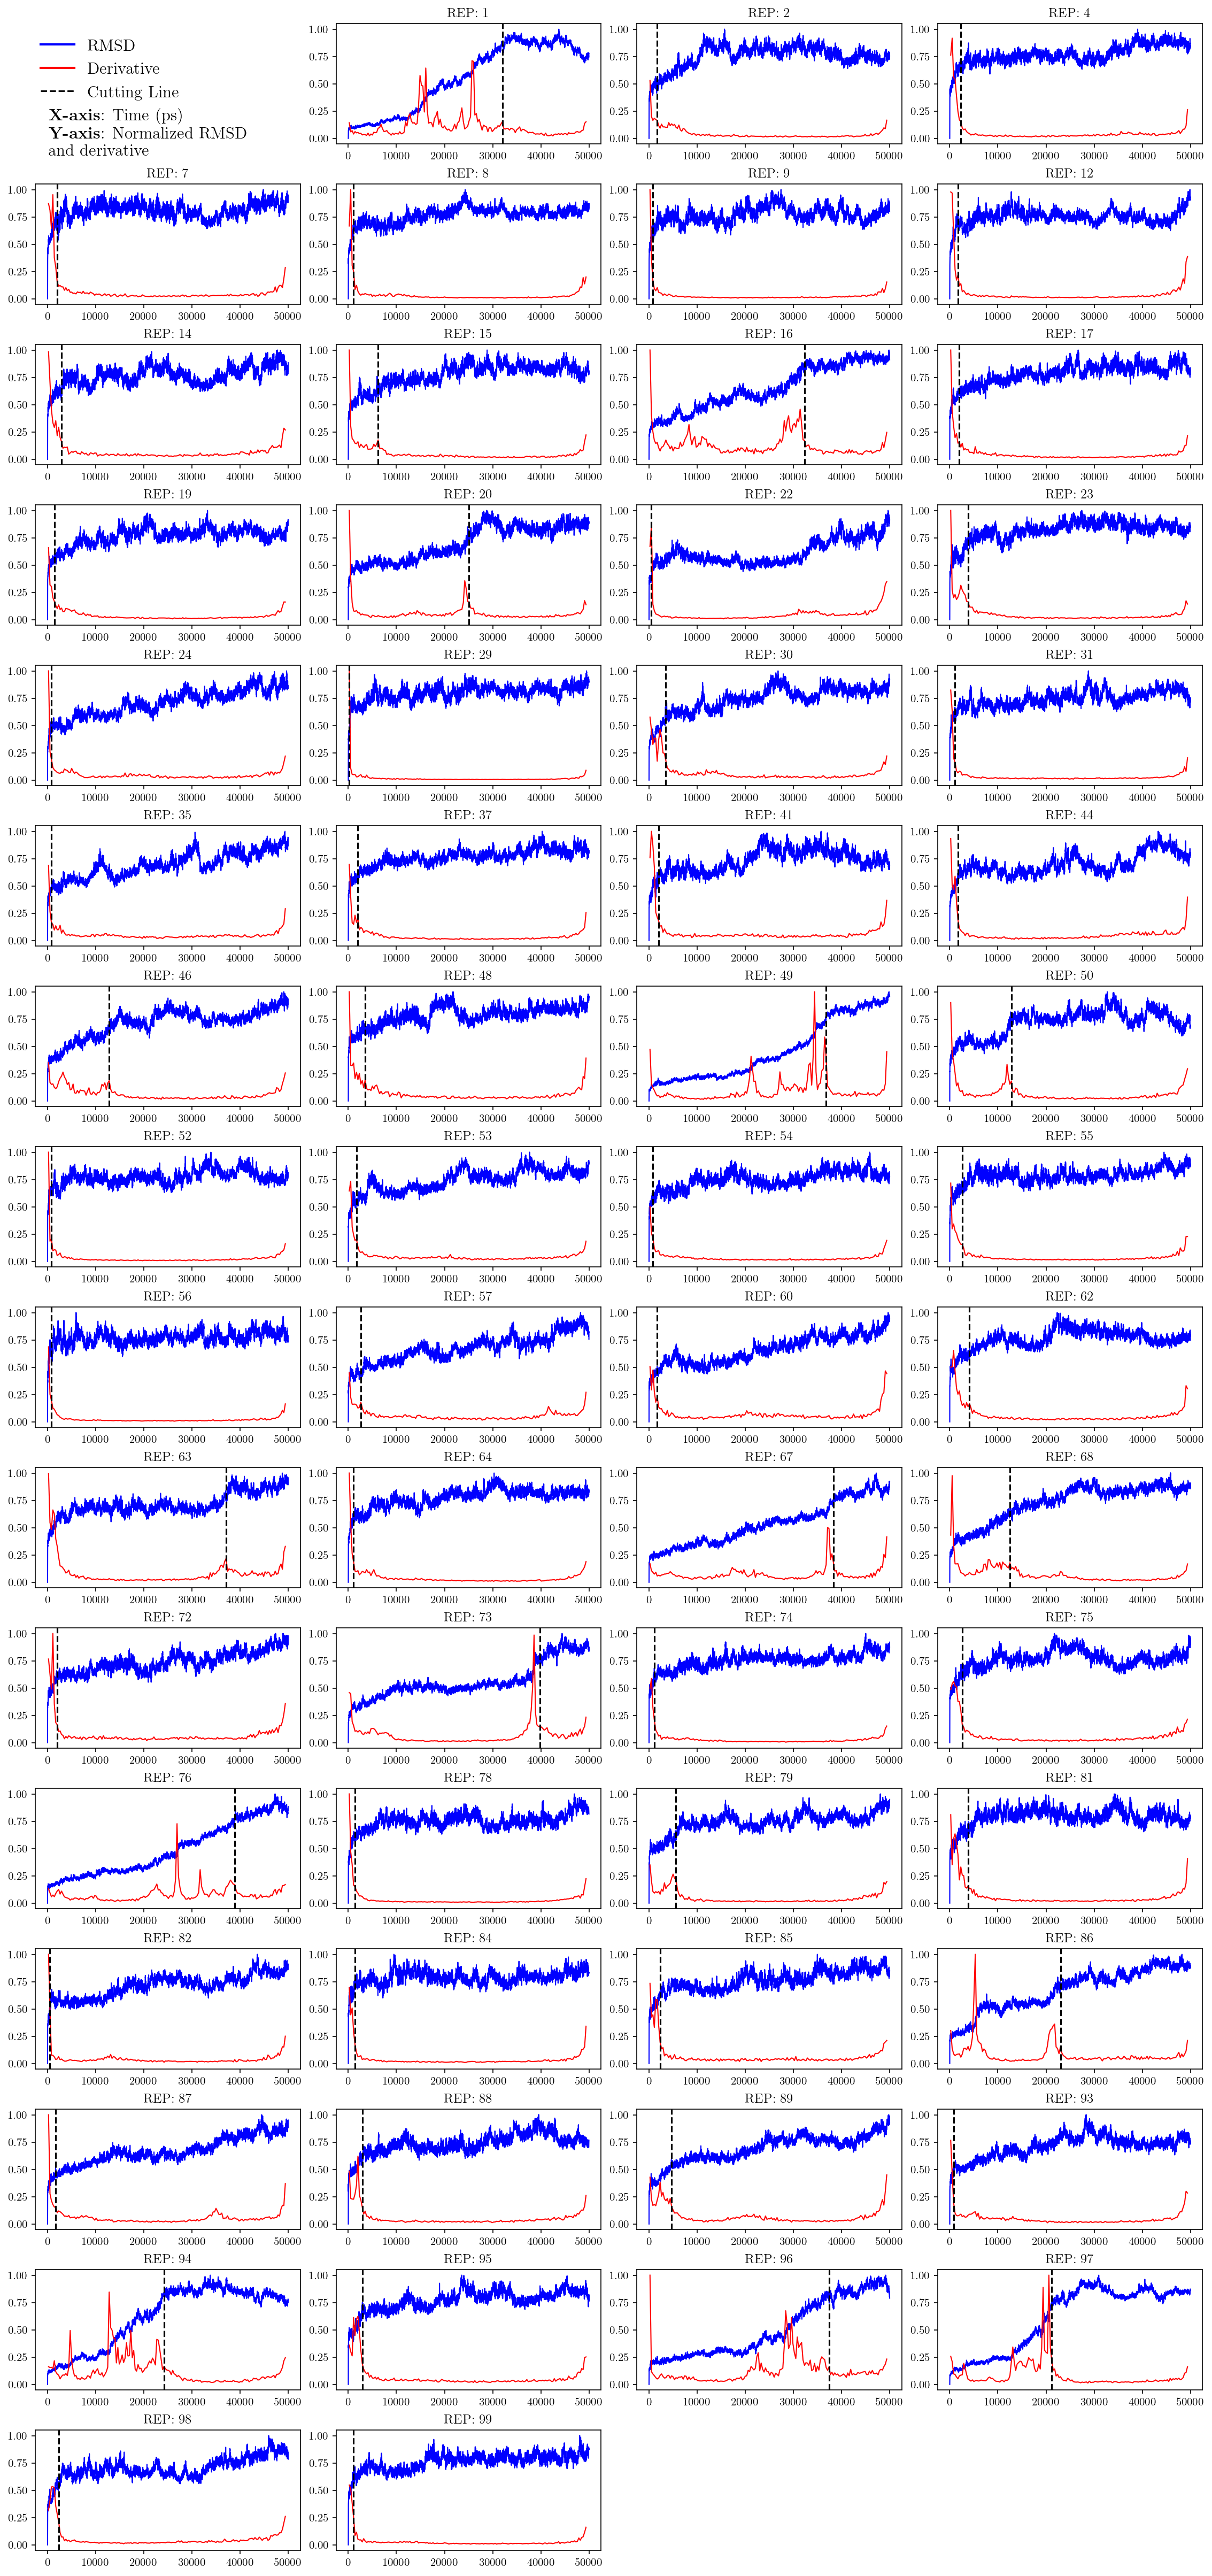

In [6]:
system = "5gjv_VSD_II_sin_S4_5_80A_E=0,145"

file = f"dataframes/data_rmsd_{system}.csv"

data = pd.read_csv(file)
data.set_index(['R', 'Time'], inplace=True)
rmsd = "rmsd"
cols = [rmsd]
df_imp = data[cols]


chosen_reps = get_converged_cases(df_imp, reps=100, criterion=0.15, col=rmsd)

exceptions = []
chosen_reps_ = [chosen for chosen in chosen_reps if chosen[0] not in exceptions]
len(chosen_reps_)

COLS = 4
ROWS = (len(chosen_reps_)//COLS)+1

# Configuración de la matriz de gráficos
fig = plt.figure(constrained_layout=True, dpi=150, figsize=(15, ROWS*2))
gs = fig.add_gridspec(ROWS, COLS)  # 10 filas y 4 columnas

# Crear los gráficos en la matriz, dejando la primera celda (0,0) para la leyenda
for i, tup in enumerate(chosen_reps_):
    rep = tup[0]
    tmax = tup[1]

    df = df_imp.xs(rep, level='R')
    t = df.index.get_level_values('Time')
    x = df[rmsd]/df[rmsd].max()

    t_sm, x_sm = get_lowess_derivative(t, x, ini=20, fin=None)

    row = (i + 1) // 4
    col = (i + 1) % 4
    ax = fig.add_subplot(gs[row, col])

    ax.set_title(f"REP: {rep}")
    ax.plot(t, x, "b-", linewidth=1)
    ax.plot(t_sm[:-2], x_sm[:-2], "r-", linewidth=1)
    ax.axvline(tmax, color="k", linestyle="--")

# Crear el espacio para la leyenda
legend_ax = fig.add_subplot(gs[0, 0])  # Primera fila, primera columna
legend_ax.axis('off')  # Ocultar el eje

# Crear la leyenda
lines = [
    plt.Line2D([0], [0], color='b', lw=2, label=f'RMSD'),
    plt.Line2D([0], [0], color='r', lw=2, label=f'Derivative'),
    plt.Line2D([0], [0], color='k', linestyle="--", lw=1.5, label=f'Cutting Line')
]
legend_ax.legend(handles=lines, bbox_to_anchor=(0.6, 1.), ncol=1, fontsize=15).get_frame().set_edgecolor('none')
legend_ax.text(0.05, 0.3, u"\\textbf{X-axis}: Time (ps)\n\\textbf{Y-axis}: Normalized RMSD \nand derivative",
                ha='left', va='top', transform=legend_ax.transAxes, fontsize=15)

plt.savefig(f"chosen_reps/figures/{system}.png", bbox_inches="tight")
create_chosen_list(chosen_reps_, f"chosen_reps/TXT/{system}.txt")

plt.show()


In [8]:
len(chosen_reps_)

61

In [10]:
a = set([47,36,83,40,65,69])
b = set(i for i, j in chosen_reps_)

a & b

set()

# E=-0,18

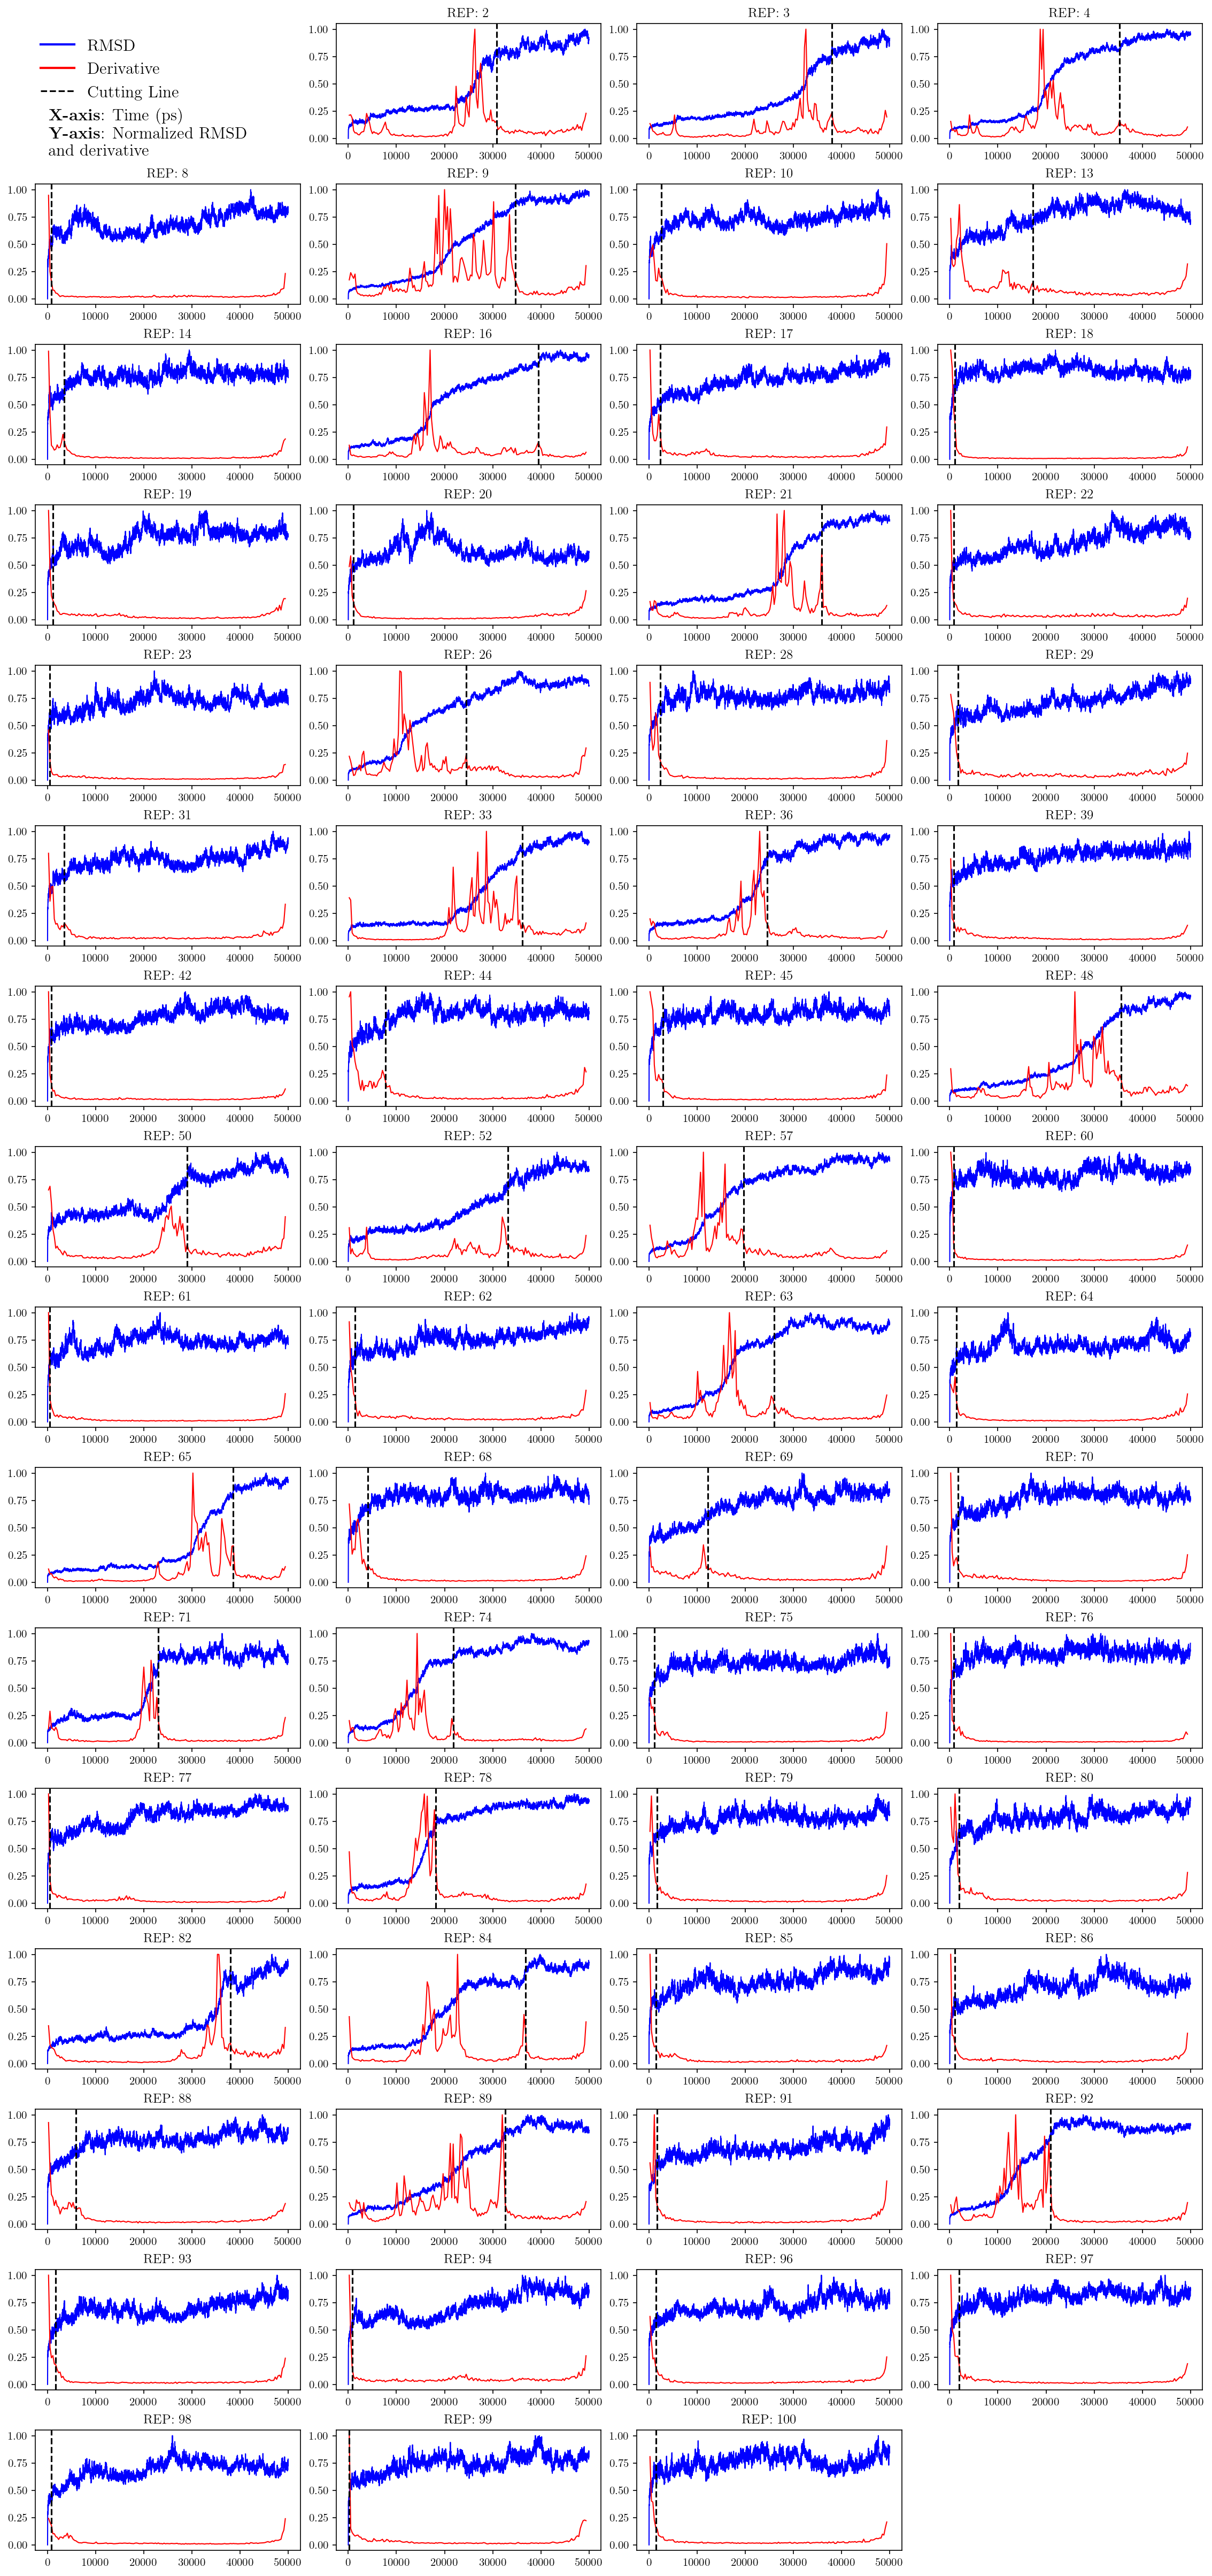

In [10]:
system = "5gjv_VSD_II_sin_S4_5_80A_E=-0,18"

file = f"dataframes/data_{system}.csv"

data = pd.read_csv(file)
data.set_index(['R', 'Time'], inplace=True)
cols = ["rmsd_prot"]
df_imp = data[cols]


chosen_reps = get_converged_cases(df_imp, reps=100)

exceptions = []
chosen_reps_ = [chosen for chosen in chosen_reps if chosen[0] not in exceptions]
len(chosen_reps_)

COLS = 4
ROWS = (len(chosen_reps_)//COLS)+1

# Configuración de la matriz de gráficos
fig = plt.figure(constrained_layout=True, dpi=150, figsize=(15, ROWS*2))
gs = fig.add_gridspec(ROWS, COLS)  # 10 filas y 4 columnas

# Crear los gráficos en la matriz, dejando la primera celda (0,0) para la leyenda
for i, tup in enumerate(chosen_reps_):
    rep = tup[0]
    tmax = tup[1]

    df = df_imp.xs(rep, level='R')
    t = df.index.get_level_values('Time')
    x = df["rmsd_prot"]/df["rmsd_prot"].max()

    t_sm, x_sm = get_lowess_derivative(t, x, ini=20, fin=None)

    row = (i + 1) // 4
    col = (i + 1) % 4
    ax = fig.add_subplot(gs[row, col])

    ax.set_title(f"REP: {rep}")
    ax.plot(t, x, "b-", linewidth=1)
    ax.plot(t_sm[:-2], x_sm[:-2], "r-", linewidth=1)
    ax.axvline(tmax, color="k", linestyle="--")

# Crear el espacio para la leyenda
legend_ax = fig.add_subplot(gs[0, 0])  # Primera fila, primera columna
legend_ax.axis('off')  # Ocultar el eje

# Crear la leyenda
lines = [
    plt.Line2D([0], [0], color='b', lw=2, label=f'RMSD'),
    plt.Line2D([0], [0], color='r', lw=2, label=f'Derivative'),
    plt.Line2D([0], [0], color='k', linestyle="--", lw=1.5, label=f'Cutting Line')
]
legend_ax.legend(handles=lines, bbox_to_anchor=(0.6, 1.), ncol=1, fontsize=15).get_frame().set_edgecolor('none')
legend_ax.text(0.05, 0.3, u"\\textbf{X-axis}: Time (ps)\n\\textbf{Y-axis}: Normalized RMSD \nand derivative",
                ha='left', va='top', transform=legend_ax.transAxes, fontsize=15)

plt.savefig(f"chosen_reps/figures/{system}.png", bbox_inches="tight")
create_chosen_list(chosen_reps_, f"chosen_reps/TXT/{system}.txt")

plt.show()